In [1]:
#import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_validate

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
pd.set_option("display.precision", 4)

In [3]:
#Reading the data
df = pd.read_csv("./precleaned-datasets/dataset_1.csv")

In [4]:
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
1,0,0,0.0,3.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
2,0,0,0.0,5.88,0.0,0,0,0,0,0,...,0.0,0,0,3,0,0,0,0.0,67772.7216,0
3,0,0,0.0,14.10,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
4,0,0,0.0,5.76,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(
    labels=["target"], axis=1), df["target"], test_size=0.33, random_state=42)

# Constant Features, Quasi-Constant Features and Duplicated Features

## Removing Constant Features

### Using Scikit-Learn

In [6]:
sel = VarianceThreshold(threshold=0.0) #Remove the features with zero variance.

In [7]:
X_train_sklearn = sel.fit_transform(X_train)

In [8]:
sel.get_support()[:10] #example of get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [9]:
print(
    f"Original dataset has {X_train.shape[1]} features and after removing the constant features {X_train_sklearn.shape[1]}.")

Original dataset has 300 features and after removing the constant features 258.


In [10]:
#Lisf of the deleted features
X_train.columns[~sel.get_support()]

Index(['var_14', 'var_23', 'var_33', 'var_34', 'var_44', 'var_61', 'var_66',
       'var_67', 'var_69', 'var_73', 'var_80', 'var_81', 'var_87', 'var_89',
       'var_92', 'var_97', 'var_99', 'var_112', 'var_113', 'var_120',
       'var_122', 'var_127', 'var_129', 'var_135', 'var_158', 'var_167',
       'var_171', 'var_178', 'var_180', 'var_182', 'var_183', 'var_195',
       'var_196', 'var_201', 'var_212', 'var_215', 'var_225', 'var_227',
       'var_248', 'var_287', 'var_294', 'var_297'],
      dtype='object')

In [11]:
feature_names = X_train.columns[sel.get_support()]

If the variables are numerical is ok, but if the variables are categorical, we need to encode them before. 

### Using Pandas

#### Method STD()

In [12]:
constant_feature = [
    feat for feat in X_train.columns if X_train[feat].std() == 0]

In [13]:
len(constant_feature)

42

In [14]:
X_train.drop(labels=constant_feature,axis=1).head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_289,var_290,var_291,var_292,var_293,var_295,var_296,var_298,var_299,var_300
23990,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
8729,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
3451,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
2628,0,0,0.0,2.76,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
38352,0,0,0.0,2.88,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0


If the variables are numerical is ok, but if the variables are categorical, we need to encode them before. 

#### Method nunique()

In [15]:
# But ignore missing values, so have to be dropped by using dropna.
constant_feature_2 = [
    feat for feat in X_train.columns if X_train[feat].nunique() == 1]

In [16]:
len(constant_feature_2)

42

In [17]:
X_train.drop(labels=constant_feature_2,axis=1).head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_289,var_290,var_291,var_292,var_293,var_295,var_296,var_298,var_299,var_300
23990,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
8729,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
3451,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
2628,0,0,0.0,2.76,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0
38352,0,0,0.0,2.88,0.0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0.0,0.0


Works with both numerical and categorical data!

## Quasi-Constant Features

In [18]:
sel = VarianceThreshold(threshold=0.01) #Remove the features with zero variance and also quasi-constant features.

In [19]:
X_train_sklearn_2 = sel.fit_transform(X_train)

In [20]:
print(
    f"Original dataset has {X_train.shape[1]} features and after removing the constant features {X_train_sklearn_2.shape[1]}.")

Original dataset has 300 features and after removing the constant features 212.


Almost of third of the features have been removed.

In [21]:
X_train.columns[~sel.get_support()]

Index(['var_2', 'var_7', 'var_9', 'var_10', 'var_14', 'var_19', 'var_23',
       'var_28', 'var_33', 'var_34', 'var_36', 'var_43', 'var_44', 'var_45',
       'var_53', 'var_54', 'var_56', 'var_61', 'var_66', 'var_67', 'var_69',
       'var_71', 'var_73', 'var_80', 'var_81', 'var_87', 'var_89', 'var_92',
       'var_97', 'var_99', 'var_104', 'var_106', 'var_112', 'var_113',
       'var_116', 'var_120', 'var_122', 'var_127', 'var_129', 'var_133',
       'var_135', 'var_137', 'var_141', 'var_146', 'var_158', 'var_167',
       'var_170', 'var_171', 'var_177', 'var_178', 'var_180', 'var_182',
       'var_183', 'var_187', 'var_189', 'var_194', 'var_195', 'var_196',
       'var_197', 'var_198', 'var_201', 'var_212', 'var_215', 'var_218',
       'var_219', 'var_223', 'var_225', 'var_227', 'var_233', 'var_234',
       'var_235', 'var_245', 'var_247', 'var_248', 'var_249', 'var_250',
       'var_251', 'var_256', 'var_260', 'var_267', 'var_274', 'var_282',
       'var_285', 'var_287', 'var_289', 

In [22]:
#To check the quasi-constant features
X_train["var_2"].value_counts(normalize=True) * 100

0    99.997
1     0.003
Name: var_2, dtype: float64

In [23]:
X_train["var_2"].value_counts(normalize=True).sort_values(ascending=False)

0    9.9997e-01
1    2.9851e-05
Name: var_2, dtype: float64

In [24]:
# Append a list of constant and quasi-constant features.
list_predominant_features = []
for i in X_train.columns:
    if X_train[i].value_counts(normalize=True).sort_values(ascending=False).values[0] > 0.998:
        list_predominant_features.append(i)

In [25]:
X_train.drop(labels=list_predominant_features,axis=1).head()

,var_4,var_5,var_8,var_13,var_15,var_16,var_17,var_18,var_19,var_21,...,var_279,var_281,var_284,var_288,var_291,var_292,var_293,var_295,var_296,var_300
23990,2.79,0.0,0,0.0,3,0.0,2.94,0.0,0,2.94,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
8729,0.00,0.0,0,0.0,0,0.0,0.00,0.0,0,0.00,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
3451,2.79,0.0,0,0.0,3,0.0,0.00,0.0,0,27.30,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
2628,2.76,0.0,0,0.0,3,0.0,0.00,0.0,0,2.82,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
38352,2.88,0.0,0,0.0,3,0.0,0.00,0.0,0,86.40,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0


We removed most half of the features of the dataset!

## Removing Duplicated Features

In [26]:
duplicated_feat_pairs = {}

duplicated_feat = []

for i in tqdm(range(0, len(X_train.columns))):

    feat_1 = X_train.columns[i]

    if feat_1 not in duplicated_feat:

        duplicated_feat_pairs[feat_1] = []

        for feat_2 in X_train.columns[i + 1:]:

            if X_train[feat_1].equals(X_train[feat_2]):

                duplicated_feat_pairs[feat_1].append(feat_2)

                duplicated_feat.append(feat_2)

100%|██████████| 300/300 [00:01<00:00, 202.33it/s]


In [27]:
X_train.drop(labels=duplicated_feat,axis=1).head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_286,var_288,var_290,var_291,var_292,var_293,var_295,var_298,var_299,var_300
23990,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
8729,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
3451,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
2628,0,0,0.0,2.76,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
38352,0,0,0.0,2.88,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0


In [28]:
len(duplicated_feat)

56

56 features are duplicated!

## Using Feature-Engine

In [29]:
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import DropDuplicateFeatures

In [30]:
# Remove the constant and quasi-constant features
sel = DropConstantFeatures(tol=0.998, variables=None,
                           missing_values="raise")  # tol = Tolerance, max=1

In [31]:
sel.fit_transform(X_train).head()

,var_4,var_5,var_8,var_13,var_15,var_17,var_18,var_19,var_21,var_22,...,var_279,var_281,var_284,var_288,var_291,var_292,var_293,var_295,var_296,var_300
23990,2.79,0.0,0,0.0,3,2.94,0.0,0,2.94,0.0,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
8729,0.00,0.0,0,0.0,0,0.00,0.0,0,0.00,0.0,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
3451,2.79,0.0,0,0.0,3,0.00,0.0,0,27.30,0.0,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
2628,2.76,0.0,0,0.0,3,0.00,0.0,0,2.82,0.0,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0
38352,2.88,0.0,0,0.0,3,0.00,0.0,0,86.40,0.0,...,0.0,0,0,0.0,0,0.0,0,0,0,0.0


In [32]:
sel_duplicated = DropDuplicateFeatures(variables=None, missing_values="ignore")

In [33]:
# Remove the duplicate features
sel_duplicated.fit_transform(X_train).head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_286,var_288,var_290,var_291,var_292,var_293,var_295,var_298,var_299,var_300
23990,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
8729,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
3451,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
2628,0,0,0.0,2.76,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0
38352,0,0,0.0,2.88,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0


Now, with a pipeline...

In [34]:
pipeline = Pipeline(
    [("DropConstantFeatures", DropConstantFeatures(tol=0.998, variables=None, missing_values="raise")),
     ("DropDuplicateFeatures", DropDuplicateFeatures(
         variables=None, missing_values="ignore"))
     ]
)

In [35]:
pipeline.fit_transform(X_train).head()

,var_4,var_5,var_8,var_13,var_15,var_17,var_18,var_19,var_21,var_22,...,var_278,var_279,var_281,var_284,var_288,var_291,var_292,var_293,var_295,var_300
23990,2.79,0.0,0,0.0,3,2.94,0.0,0,2.94,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0.0
8729,0.00,0.0,0,0.0,0,0.00,0.0,0,0.00,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0.0
3451,2.79,0.0,0,0.0,3,0.00,0.0,0,27.30,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0.0
2628,2.76,0.0,0,0.0,3,0.00,0.0,0,2.82,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0.0
38352,2.88,0.0,0,0.0,3,0.00,0.0,0,86.40,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0.0


Close to a half of the features have been removed...!

In [36]:
print(
    f'Number of features to be dropped during the first step: {len(pipeline["DropConstantFeatures"].features_to_drop_)}')
print(
    f'Number of features to be dropped during the second step: {len(pipeline["DropDuplicateFeatures"].features_to_drop_)}')

Number of features to be dropped during the first step: 139
Number of features to be dropped during the second step: 6


# Correlation Methods

In [37]:
#The correlation matrix
correlation_matrix = X_train.corr()

<Figure size 432x288 with 0 Axes>

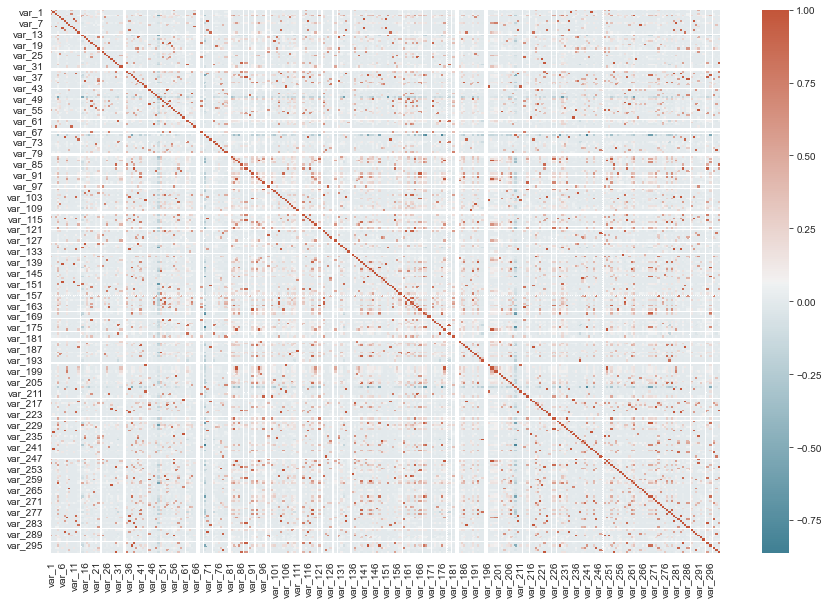

<Figure size 432x288 with 0 Axes>

In [38]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,cmap=cmap)
plt.figure()

## Brute force

In [39]:
def correlation_filter(dataset, threshold):
    correlation = set()
    correlation_matrix = dataset.corr()
    for i in tqdm(range(0, len(correlation_matrix.columns))):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j] > threshold):
                correlation.add(correlation_matrix.columns[i])
    return correlation

In [40]:
corr_feature = correlation_filter(X_train,0.8)

len(set(corr_feature))

100%|██████████| 300/300 [00:01<00:00, 219.28it/s]


139

We can remove 139 highly correlated features without impacting the performance of our machine learning algorithm.

In [41]:
X_train.drop(labels=corr_feature,axis=1).head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_271,var_274,var_275,var_276,var_287,var_288,var_292,var_293,var_294,var_297
23990,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
8729,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
3451,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
2628,0,0,0.0,2.76,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
38352,0,0,0.0,2.88,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0


## Group method

In [42]:
corr_matrix = X_train.corr()
corr_matrix = corr_matrix.abs().unstack() # Keep just the abs value
corr_matrix = corr_matrix[corr_matrix >= 0.8] #Threshold = 0.8
corr_matrix = corr_matrix[corr_matrix < 0.99999] # Not interested in self correlated features
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ["feature_1","feature_2","corr"]

In [43]:
corr_matrix.head()

,feature_1,feature_2,corr
0,var_3,var_65,0.8040
1,var_4,var_262,0.9816
2,var_7,var_228,0.8176
3,var_7,var_233,0.9622
4,var_8,var_281,0.9987


In [44]:
correlation = {}

for feature in corr_matrix["feature_1"].unique():
    if feature not in correlation.keys():
        correlation[feature] = corr_matrix[corr_matrix["feature_1"] == feature]

In [45]:
print(f" Number of correlated groups found: {len(correlation.keys())}")

 Number of correlated groups found: 179


After that, we can further check the features and select which ones are the most useful (less missing values, less redundancy, etc...) or use a ML algorithm to select the most important features.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
features = list(correlation["var_12"].values[:, 1])
features.append("var_12")

In [48]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(n_jobs=-1)

In [49]:
importance = pd.concat(
    [pd.Series(features), pd.DataFrame(rf.feature_importances_)], axis=1)

In [50]:
importance.columns = ["features", "importance"]
importance.sort_values(by="importance", ascending=False)

,features,importance
5,var_233,0.5264
3,var_210,0.1679
8,var_12,0.1368
7,var_283,0.0504
4,var_223,0.0368
1,var_104,0.0291
2,var_133,0.0263
6,var_280,0.0263
0,var_36,0.0000


In that case, we would keep only the var_233 due to its relative importance compare to the rest of the features...

## With Feature-Engine

In [51]:
from feature_engine.selection import SmartCorrelatedSelection, DropCorrelatedFeatures

### Brute force approach with Feature-Engine

In [52]:
sel = DropCorrelatedFeatures(variables=None,
                             method='pearson',
                             threshold=0.8,
                             missing_values='ignore',
                             )

In [53]:
sel.fit_transform(X_train).head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_271,var_274,var_275,var_276,var_287,var_288,var_292,var_293,var_294,var_297
23990,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
8729,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
3451,0,0,0.0,2.79,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
2628,0,0,0.0,2.76,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0
38352,0,0,0.0,2.88,0.0,0,0,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0


In [54]:
sel.correlated_feature_sets_[:10] #Example

[{'var_2', 'var_234', 'var_243'},
 {'var_3', 'var_65'},
 {'var_262', 'var_4'},
 {'var_11', 'var_141', 'var_151', 'var_6'},
 {'var_116', 'var_228', 'var_233', 'var_289', 'var_7', 'var_71'},
 {'var_281', 'var_8'},
 {'var_265', 'var_9'},
 {'var_104',
  'var_12',
  'var_133',
  'var_210',
  'var_223',
  'var_280',
  'var_283',
  'var_36'},
 {'var_13', 'var_153', 'var_187', 'var_217', 'var_285', 'var_72'},
 {'var_132', 'var_15', 'var_152'}]

### Group method approach with Feature-Engine

In [55]:
sel = SmartCorrelatedSelection(variables=None,
                               method='pearson',
                               threshold=0.8,
                               missing_values='ignore',
                               selection_method='model_performance', #Using a ML algorithm
                               estimator=rf, #Using the RandomForest we set up previously
                               scoring='roc_auc',
                               cv=3
                               )

In [56]:
sel.fit_transform(X_train,y_train).head()

,var_1,var_3,var_5,var_7,var_8,var_9,var_10,var_12,var_14,var_17,...,var_278,var_279,var_286,var_287,var_288,var_292,var_293,var_294,var_297,var_298
23990,0,0.0,0.0,0,0,0,0,0.0,0,2.94,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0
8729,0,0.0,0.0,0,0,0,0,0.0,0,0.00,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0
3451,0,0.0,0.0,0,0,0,0,0.0,0,0.00,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0
2628,0,0.0,0.0,0,0,0,0,0.0,0,0.00,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0
38352,0,0.0,0.0,0,0,0,0,0.0,0,0.00,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0


In [57]:
groups = sel.correlated_feature_sets_[4]

In [58]:
sel.correlated_feature_sets_[:10] #Example

[{'var_2', 'var_234', 'var_243'},
 {'var_3', 'var_65'},
 {'var_262', 'var_4'},
 {'var_11', 'var_141', 'var_151', 'var_6'},
 {'var_116', 'var_228', 'var_233', 'var_289', 'var_7', 'var_71'},
 {'var_281', 'var_8'},
 {'var_265', 'var_9'},
 {'var_104',
  'var_12',
  'var_133',
  'var_210',
  'var_223',
  'var_280',
  'var_283',
  'var_36'},
 {'var_13', 'var_153', 'var_187', 'var_217', 'var_285', 'var_72'},
 {'var_132', 'var_15', 'var_152'}]

In [59]:
for f in groups:
    model = cross_validate(rf,
                           X_train[f].to_frame(),
                           y_train,
                           scoring="roc_auc",
                           return_estimator=False,
                           cv=3
                           )
    print(f,model["test_score"].mean())

var_7 0.50004662004662
var_71 0.50004662004662
var_228 0.50001554001554
var_116 0.50004662004662
var_233 0.50003108003108
var_289 0.50004662004662


In [60]:
#We should keep the feature with the highest score.

### Variance with Feature-Engine

In [61]:
sel = SmartCorrelatedSelection(variables=None,
                               method='pearson',
                               threshold=0.8,
                               missing_values='ignore',
                               selection_method='variance', #Using a ML algorithm
                               estimator=None, #Using the RandomForest we set up previously
                               scoring="roc_auc",
                               cv=3
                               )

In [62]:
sel.fit_transform(X_train,y_train).head()

,var_1,var_3,var_4,var_5,var_8,var_10,var_14,var_15,var_17,var_18,...,var_286,var_287,var_288,var_291,var_292,var_293,var_294,var_297,var_298,var_299
23990,0,0.0,2.79,0.0,0,0,0,3,2.94,0.0,...,0.0,0,0.0,0,0.0,0,0,0,0,0.0
8729,0,0.0,0.00,0.0,0,0,0,0,0.00,0.0,...,0.0,0,0.0,0,0.0,0,0,0,0,0.0
3451,0,0.0,2.79,0.0,0,0,0,3,0.00,0.0,...,0.0,0,0.0,0,0.0,0,0,0,0,0.0
2628,0,0.0,2.76,0.0,0,0,0,3,0.00,0.0,...,0.0,0,0.0,0,0.0,0,0,0,0,0.0
38352,0,0.0,2.88,0.0,0,0,0,3,0.00,0.0,...,0.0,0,0.0,0,0.0,0,0,0,0,0.0


In [63]:
sel.correlated_feature_sets_[1]

{'var_3', 'var_65'}

In [64]:
X_train[sel.correlated_feature_sets_[1]].std()

var_65    1146.4478
var_3     1412.7085
dtype: float64

We can see that the var_3 has the highest variance so it'll be kept and var_65 will be remove.

In [65]:
"var_3" in sel.features_to_drop_

False

In [66]:
"var_65" in sel.features_to_drop_

True

### Unique values with Feature-Engine

In [67]:
sel = SmartCorrelatedSelection(variables=None,
                               method='pearson',
                               threshold=0.8,
                               missing_values='ignore',
                               selection_method='cardinality', #Using values count
                               estimator=None, #Using the RandomForest we set up previously
                               scoring=None,
                               cv=3
                               )

In [68]:
sel.fit_transform(X_train,y_train).head()

,var_1,var_3,var_4,var_5,var_8,var_10,var_12,var_13,var_14,var_17,...,var_274,var_275,var_276,var_287,var_288,var_292,var_293,var_294,var_297,var_298
23990,0,0.0,2.79,0.0,0,0,0.0,0.0,0,2.94,...,0,0,0.0,0,0.0,0.0,0,0,0,0
8729,0,0.0,0.00,0.0,0,0,0.0,0.0,0,0.00,...,0,0,0.0,0,0.0,0.0,0,0,0,0
3451,0,0.0,2.79,0.0,0,0,0.0,0.0,0,0.00,...,0,0,0.0,0,0.0,0.0,0,0,0,0
2628,0,0.0,2.76,0.0,0,0,0.0,0.0,0,0.00,...,0,0,0.0,0,0.0,0.0,0,0,0,0
38352,0,0.0,2.88,0.0,0,0,0.0,0.0,0,0.00,...,0,0,0.0,0,0.0,0.0,0,0,0,0


In [69]:
sel.correlated_feature_sets_[1]

{'var_3', 'var_65'}

In [70]:
"var_3" in sel.features_to_drop_

False

In [71]:
"var_65" in sel.features_to_drop_

True

In [72]:
X_train[list(sel.correlated_feature_sets_[1])[0]].value_counts(normalize=True) * 100

0.0000         99.994
22.4652         0.003
209834.4000     0.003
Name: var_65, dtype: float64

In [73]:
X_train[list(sel.correlated_feature_sets_[1])[1]].value_counts(normalize=True) * 100

0.0000         99.9433
861.0900        0.0030
101195.4735     0.0030
15028.0560      0.0030
2641.0164       0.0030
52105.7901      0.0030
10385.4912      0.0030
207901.3365     0.0030
16086.9720      0.0030
5209.9500       0.0030
86718.0000      0.0030
12542.3100      0.0030
27.3000         0.0030
6211.5165       0.0030
25905.4866      0.0030
3583.3941       0.0030
35685.9459      0.0030
13297.0320      0.0030
7134.8904       0.0030
12644.1000      0.0030
Name: var_3, dtype: float64

It indeed keeps the features with the most different values.

### Missing values with Feature-Engine

In [74]:
sel = SmartCorrelatedSelection(variables=None,
                               method='pearson',
                               threshold=0.8,
                               missing_values='ignore',
                               selection_method='missing_values', #Using missing values
                               estimator=None, #Using the RandomForest we set up previously
                               scoring=None,
                               cv=3
                               )

In [75]:
sel.fit_transform(X_train,y_train).head()

,var_1,var_5,var_7,var_8,var_9,var_10,var_12,var_13,var_14,var_17,...,var_276,var_282,var_287,var_288,var_290,var_292,var_293,var_294,var_295,var_297
23990,0,0.0,0,0,0,0,0.0,0.0,0,2.94,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
8729,0,0.0,0,0,0,0,0.0,0.0,0,0.00,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
3451,0,0.0,0,0,0,0,0.0,0.0,0,0.00,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
2628,0,0.0,0,0,0,0,0.0,0.0,0,0.00,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
38352,0,0.0,0,0,0,0,0.0,0.0,0,0.00,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0


In [76]:
sel.correlated_feature_sets_[1]

{'var_3', 'var_65'}

In [77]:
"var_3" in sel.features_to_drop_

True

In [78]:
"var_65" in sel.features_to_drop_

False

In [79]:
X_train[list(sel.correlated_feature_sets_[1])[0]].isnull().sum()

0

In [80]:
X_train[list(sel.correlated_feature_sets_[1])[1]].isnull().sum()

0

## Pipeline with Feature-Engine

In [81]:
pipeline = Pipeline([
    ("Constant", DropConstantFeatures(tol=0.998)),
    ("Duplicated", DropDuplicateFeatures()),
    ("Correlation", SmartCorrelatedSelection(variables=None,
                                             method='pearson',
                                             threshold=0.8,
                                             missing_values='ignore',
                                             selection_method='variance',  # Using missing values
                                             estimator=None,  # Using the RandomForest we set up previously
                                             scoring=None,
                                             cv=3
                                             ))
])

In [82]:
pipeline.fit_transform(X_train,y_train).head()

,var_4,var_5,var_8,var_13,var_15,var_17,var_18,var_22,var_25,var_26,...,var_271,var_272,var_273,var_275,var_276,var_278,var_288,var_291,var_292,var_293
23990,2.79,0.0,0,0.0,3,2.94,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0
8729,0.00,0.0,0,0.0,0,0.00,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0
3451,2.79,0.0,0,0.0,3,0.00,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0
2628,2.76,0.0,0,0.0,3,0.00,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0
38352,2.88,0.0,0,0.0,3,0.00,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0


# Statistical Measure

## Mutual Information (Information gain)

Mutual information is the measure of the mutual dependence of 2 variables (quantifies the amount of information gained by on one random variable through the observation of the other random variable).

In [85]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile

In [86]:
# Calculate the mutual information of each features between the variables and the target
mi = mutual_info_classif(X_train.fillna(
    0)[:100], y_train[:100])  # Using a sample

In [87]:
mi[:50]  # Show a sample

array([0.03224655, 0.        , 0.01751257, 0.        , 0.01216049,
       0.00558131, 0.01797977, 0.01412788, 0.0069656 , 0.        ,
       0.01873024, 0.        , 0.        , 0.00111078, 0.01043431,
       0.        , 0.04159603, 0.00069743, 0.01042307, 0.00439661,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04157138, 0.        , 0.        ,
       0.02056252, 0.        , 0.00111726, 0.        , 0.        ,
       0.        , 0.01708019, 0.        , 0.        , 0.03548091,
       0.03119297, 0.        , 0.00084193, 0.02028484, 0.0077433 ,
       0.        , 0.        , 0.02106622, 0.        , 0.        ])

In [88]:
mi = pd.Series(mi)
mi.index = X_train[:100].columns
mi.sort_values(ascending=False, inplace=True)

In [89]:
mi[:20] # show the first 20

var_175    0.2287
var_179    0.2203
var_74     0.1854
var_107    0.1642
var_300    0.1326
var_62     0.1282
var_70     0.1028
var_232    0.0742
var_248    0.0537
var_92     0.0484
var_56     0.0483
var_171    0.0466
var_82     0.0447
var_283    0.0437
var_246    0.0427
var_17     0.0416
var_28     0.0416
var_40     0.0355
var_118    0.0350
var_296    0.0345
dtype: float64

In [90]:
sel = SelectKBest(mutual_info_classif,k=10)

In [91]:
sel.fit(X_train.fillna(0),y_train)

SelectKBest(score_func=<function mutual_info_classif at 0x7fa4cc2f21f0>)

In [92]:
X_train.columns[sel.get_support()]  # The best 10 features.

Index(['var_4', 'var_15', 'var_35', 'var_75', 'var_110', 'var_132', 'var_152',
       'var_222', 'var_230', 'var_262'],
      dtype='object')

In [93]:
# Now regression
housing = pd.read_csv(
    "./house-prices-advanced-regression-techniques/train.csv")

In [94]:
housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [95]:
housing.drop(labels=[
             col for col in housing.columns if housing[col].dtypes == "object"], axis=1, inplace=True)

In [96]:
mi = mutual_info_regression(housing.drop(labels=["SalePrice"], axis=1).fillna(
    0)[:100], housing["SalePrice"][:100])  # Using a sample

In [97]:
mi = pd.Series(mi)
mi.index = housing.drop(labels=["SalePrice"], axis=1)[:100].columns
mi.sort_values(ascending=False, inplace=True)

In [98]:
mi[:20] #Sample

OverallQual     0.7280
GrLivArea       0.4753
GarageArea      0.4158
TotalBsmtSF     0.3447
GarageCars      0.3389
YearBuilt       0.3340
FullBath        0.3091
MasVnrArea      0.2499
1stFlrSF        0.2482
TotRmsAbvGrd    0.2437
2ndFlrSF        0.2219
BsmtUnfSF       0.2163
YearRemodAdd    0.2101
OpenPorchSF     0.1964
Fireplaces      0.1876
BsmtFinSF1      0.1750
LotArea         0.1732
MSSubClass      0.1681
GarageYrBlt     0.1477
WoodDeckSF      0.1321
dtype: float64

In [99]:
sel = SelectPercentile(mutual_info_regression, percentile=10)

In [100]:
sel.fit(housing.drop(labels=["SalePrice"], axis=1).fillna(
    0)[:100], housing["SalePrice"][:100])  # Using a sample

SelectPercentile(score_func=<function mutual_info_regression at 0x7fa4cc2f20d0>)

In [101]:
housing.drop(labels=["SalePrice"], axis=1).fillna(
    0)[:100].columns[sel.get_support()]  # The top 10 percentiles.

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

## Chi-Square / Fisher-Score

In [102]:
from sklearn.feature_selection import chi2

Compute chi2 stat between each non negative feature and target.

This score should be used to evaluate categorical variables in a classification tasks.

In [103]:
titanic = pd.read_csv("./titanic.csv")

In [104]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.0000,0,0,211.3375,B5,S
1,1,1,male,0.9167,1,2,151.5500,C22,S
2,1,0,female,2.0000,1,2,151.5500,C22,S
3,1,0,male,30.0000,1,2,151.5500,C22,S
4,1,0,female,25.0000,1,2,151.5500,C22,S


In [105]:
titanic["sex"] = np.where(titanic["sex"] == "male", 1, 0)

original_label = {k: i for i, k in enumerate(titanic["embarked"].unique(), 0)}

titanic["embarked"] = titanic["embarked"].map(original_label)

titanic.drop(labels=["cabin"],axis=1,inplace=True)

In [106]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,0
1,1,1,1,0.9167,1,2,151.5500,0
2,1,0,0,2.0000,1,2,151.5500,0
3,1,0,1,30.0000,1,2,151.5500,0
4,1,0,0,25.0000,1,2,151.5500,0


In [107]:
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(titanic.drop(
    labels=["survived"], axis=1), titanic["survived"], test_size=0.33, random_state=42)

In [108]:
f_score = chi2(X_train_titanic.fillna(0), y_train_titanic)

In [109]:
f_score

(array([3.43528987e+01, 9.32812205e+01, 1.20480790e+00, 4.15808235e+00,
        6.93991274e+00, 5.00816457e+03, 1.07191843e+01]),
 array([4.59715156e-09, 4.53676384e-22, 2.72362846e-01, 4.14362917e-02,
        8.42932253e-03, 0.00000000e+00, 1.06030405e-03]))

In [110]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train_titanic.columns
pvalues.sort_values(ascending=False,inplace=True)

In [111]:
pvalues # The smaller the better!

age         2.7236e-01
sibsp       4.1436e-02
parch       8.4293e-03
embarked    1.0603e-03
pclass      4.5972e-09
sex         4.5368e-22
fare        0.0000e+00
dtype: float64

## Anova

In [112]:
from sklearn.feature_selection import f_regression,f_classif

In [113]:
univariate = f_classif(X_train_titanic.fillna(0), y_train_titanic)

In [114]:
pvalues = pd.Series(univariate[1])
pvalues.index = X_train_titanic.columns
pvalues.sort_values(ascending=False,inplace=True)

In [115]:
pvalues # The lower the pvalue, the better (and p-value > 0.05) but implies linear relationships.

age         6.4238e-01
sibsp       1.6954e-01
parch       5.9603e-02
embarked    1.4332e-03
fare        4.4911e-15
pclass      1.6364e-27
sex         1.3324e-68
dtype: float64

In [116]:
sel_ = SelectKBest(f_classif, k="all").fit(
    X_train_titanic.fillna(0), y_train_titanic)

In [117]:
X_train_titanic.columns[sel_.get_support()]

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

Same with the f_regression for a regression problem...

# Other methods and metrics

## Univariate Roc-AUC (classification) and RMSE (Regression)

In [118]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

### Classification

In [119]:
roc_auc = []
for feature in X_train.columns:
    # Predictor
    clf = DecisionTreeClassifier()
    # Fit the predictor
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    # Predict with the predictor
    y_predicted = clf.predict_proba(X_test[feature].to_frame())
    # Append the roc-auc score to the list
    roc_auc.append(roc_auc_score(y_test, y_predicted[:, 1]))

In [120]:
results = pd.Series(roc_auc)
results.index = X_train.columns
results.sort_values(ascending=False,inplace=True)
results = pd.DataFrame(results).reset_index()

<AxesSubplot:xlabel='0', ylabel='index'>

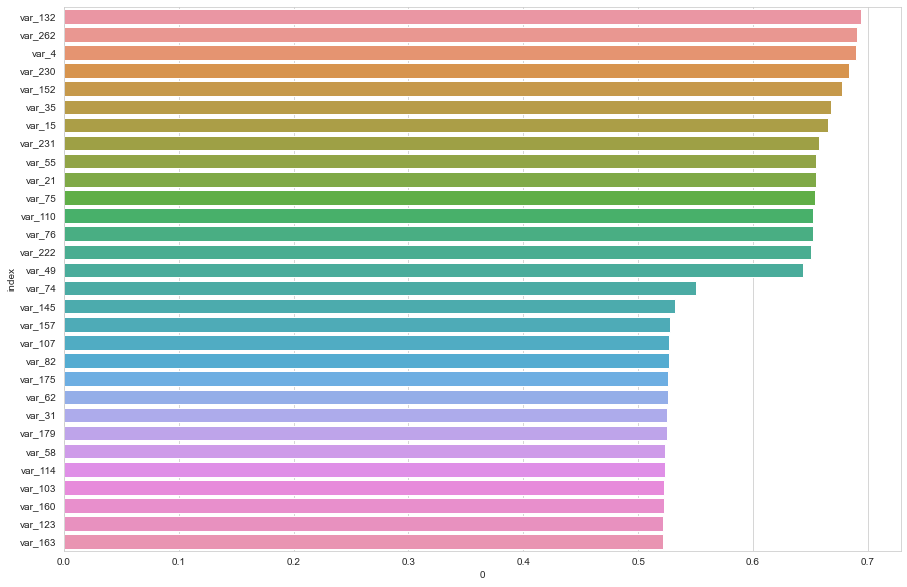

In [121]:
plt.figure(figsize=(15,10))
sns.barplot(data=results[:30], y="index", x=0) #sample 30 firsts

A roc-auc = 0.5 indicates a random decision therefore the feature has no value.

In [122]:
print(f"Number of features with roc-auc > 0.5: {results[results[0] > 0.5].shape[0]}.")

Number of features with roc-auc > 0.5: 184.


### Regression

In [123]:
housing.columns = [col for col in housing.columns if housing[col].dtype != "object"]

In [124]:
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [125]:
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(housing.drop(
    labels=["SalePrice"], axis=1), housing["SalePrice"], test_size=0.33, random_state=42)

In [126]:
rmse = []
for feature in X_train_housing.columns:
    # Predictor
    clf = DecisionTreeRegressor()
    # Fit the predictor
    clf.fit(X_train_housing[feature].fillna(0).to_frame(), y_train_housing)
    # Predict with the predictor
    y_predicted = clf.predict(X_test_housing[feature].fillna(0).to_frame())
    # Append the roc-auc score to the list
    rmse.append(mean_squared_error(y_test_housing, y_predicted))

In [127]:
results = pd.Series(rmse)
results.index = X_train_housing.columns
results.sort_values(ascending=True, inplace=True)
results = pd.DataFrame(results).reset_index()

<AxesSubplot:xlabel='0', ylabel='index'>

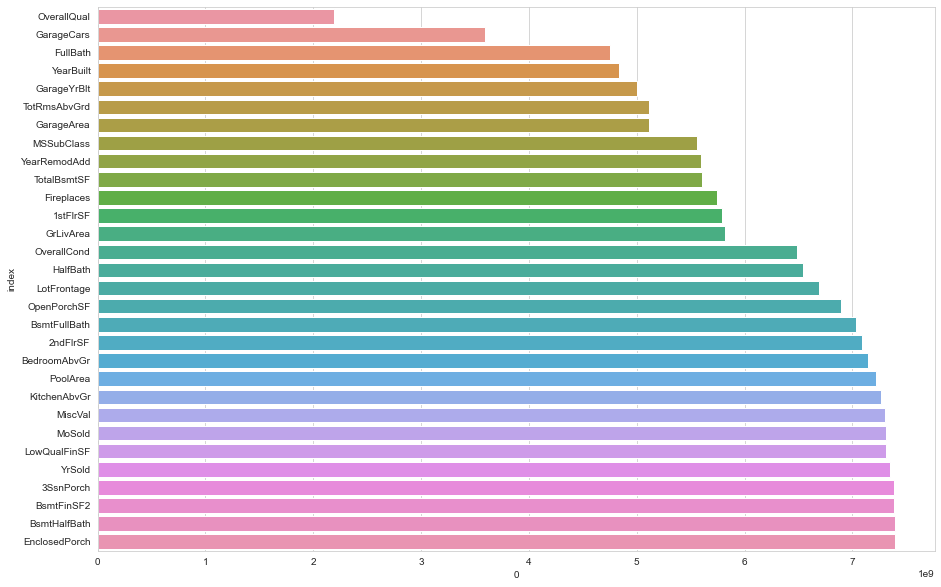

In [128]:
plt.figure(figsize=(15, 10))
sns.barplot(data=results[:30], y="index", x=0)  # sample 20 firsts

Here the cut-off is arbitrary. It depends on the number of features we want to keep.

## Target Mean Encoding

### With categorical features

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    titanic[['pclass', 'sex', 'embarked',"age",'survived',"fare"]],
    titanic['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((914, 6), (392, 6))

In [130]:
def mean_encoding(df_train, df_test, categorical_vars):
    
    # temporary copy of the original dataframes
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    # iterate over each variable
    for col in categorical_vars:
        
        # make a dictionary of categories, target-mean pairs
        target_mean_dict = df_train.groupby([col])['survived'].mean().to_dict()
        
        # replace the categories by the mean of the target
        df_train_temp[col] = df_train[col].map(target_mean_dict)
        df_test_temp[col] = df_test[col].map(target_mean_dict)
    
    # drop the target from the daatset
    df_train_temp.drop(['survived'], axis=1, inplace=True)
    df_test_temp.drop(['survived'], axis=1, inplace=True)
    
    # return  remapped datasets
    return df_train_temp, df_test_temp

In [131]:
categorical_vars = ['pclass', 'sex', 'embarked']

X_train_enc, X_test_enc = mean_encoding(X_train, X_test, categorical_vars) #X_train and X_test

X_train_enc.head()

,pclass,sex,embarked,age,fare
840,0.2439,0.1997,0.3385,29.8132,19.9667
866,0.2439,0.1997,0.3385,43.0000,6.4500
427,0.4167,0.1997,0.3385,44.0000,13.0000
478,0.4167,0.1997,0.5459,25.0000,41.5792
1305,0.2439,0.1997,0.3385,29.0000,7.8750


In [132]:
roc_values = []

for feature in categorical_vars:

    roc_values.append(roc_auc_score(y_test, X_test_enc[feature]))

In [133]:
results = pd.Series(roc_values)
results.index = X_train[categorical_vars].columns
results.sort_values(ascending=False,inplace=True)
results = pd.DataFrame(results).reset_index()

<AxesSubplot:xlabel='0', ylabel='index'>

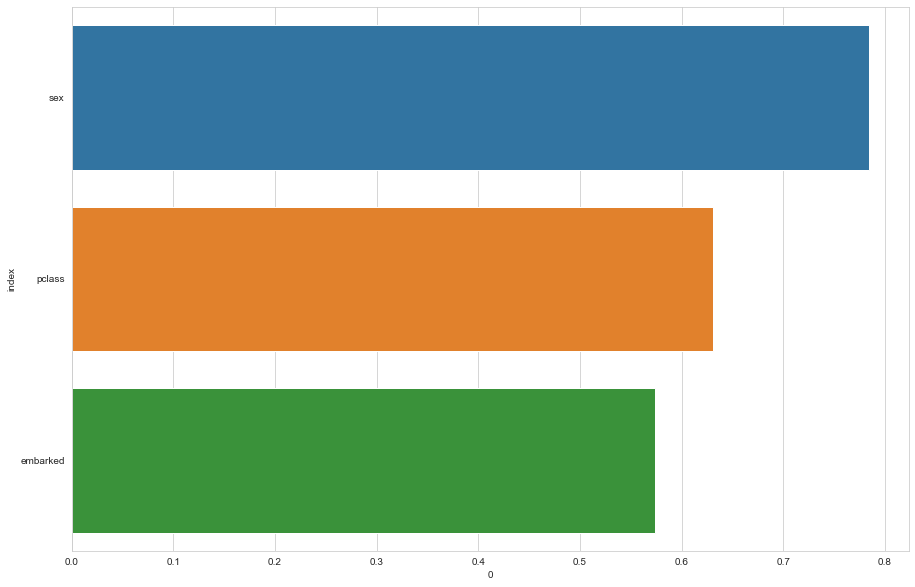

In [134]:
plt.figure(figsize=(15, 10))
sns.barplot(data=results[:30], y="index", x=0)  # sample 20 firsts

All the values are above 0.5 except sex and we can see that Pclass seems to be the most important one.

### With bins

In [135]:
# Bin first the training set
X_train['age_binned'], intervals = pd.qcut(
    X_train['age'],
    q=5,
    labels=False,
    retbins=True,
    precision=3,
    duplicates='drop',
)


# Then the testing set using the intervals from the training set
X_test['age_binned'] = pd.cut(
    x=X_test['age'], bins=intervals, labels=False)

In [136]:
# Bin first the training set
X_train['fare_binned'], intervals = pd.qcut(
    X_train_titanic['fare'],
    q=5,
    labels=False,
    retbins=True,
    precision=3,
    duplicates='drop',
)


# Then the testing set using the intervals from the training set
X_test['fare_binned'] = pd.cut(
    x=X_test['fare'], bins=intervals, labels=False)

In [137]:
binned_vars = ['age_binned', 'fare_binned']

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


X_train_enc, X_test_enc = mean_encoding(
    X_train[binned_vars+['survived']], X_test[binned_vars+['survived']], binned_vars)

X_train_enc.head()

,age_binned,fare_binned
840,0.2542,0.3475
866,0.4220,0.3487
427,0.4220,0.3487
478,0.3795,0.3487
1305,0.3795,0.3487


In [138]:
roc_values = []

for feature in binned_vars:
    
    roc_values.append(roc_auc_score(y_test, X_test_enc[feature]))

In [139]:
results = pd.Series(roc_values)
results.index = X_train[binned_vars].columns
results.sort_values(ascending=False,inplace=True)
results = pd.DataFrame(results).reset_index()

<AxesSubplot:xlabel='0', ylabel='index'>

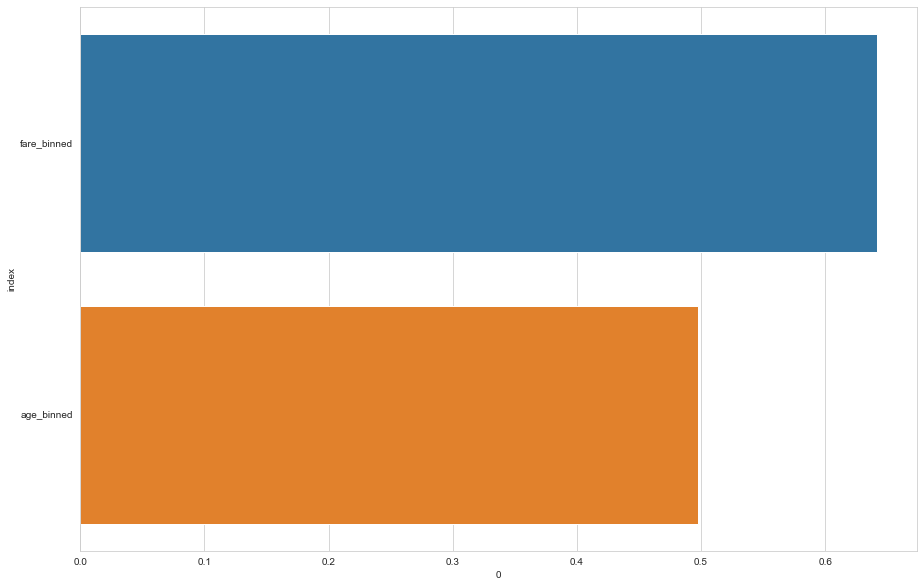

In [140]:
plt.figure(figsize=(15, 10))
sns.barplot(data=results[:30], y="index", x=0)  # sample 20 firsts

Fare is a good predictor of survival whereas age produced a ramdom output.

Alternatively, instead of binning into quantiles, we can bin into equal-distance bins.

### Using Feature-Engine

#### Univariate Classification

In [141]:
from feature_engine.selection import SelectBySingleFeaturePerformance

In [142]:
data = pd.read_csv("./precleaned-datasets/dataset_2.csv")

In [143]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(
    labels=["target"], axis=1), data["target"], test_size=0.33, random_state=42)

In [144]:
rf_clf = RandomForestClassifier(n_estimators = 10)

sel = SelectBySingleFeaturePerformance(estimator=rf,
                                       scoring='roc_auc',
                                       cv=3,
                                       threshold=0.5, #Above which the variables will be selected
                                       variables=None)

In [145]:
sel.fit(X_train[:10],y_train[:10]) # sample

SelectBySingleFeaturePerformance(estimator=RandomForestClassifier(n_jobs=-1),
                                 threshold=0.5,
                                 variables=['var_1', 'var_2', 'var_3', 'var_4',
                                            'var_5', 'var_6', 'var_7', 'var_8',
                                            'var_9', 'var_10', 'var_11',
                                            'var_12', 'var_13', 'var_14',
                                            'var_15', 'var_16', 'var_17',
                                            'var_18', 'var_19', 'var_20',
                                            'var_21', 'var_22', 'var_23',
                                            'var_24', 'var_25', 'var_26',
                                            'var_27', 'var_28', 'var_29',
                                            'var_30', ...])

In [150]:
sel.feature_performance_["var_1"] #sample

0.2222222222222222

<AxesSubplot:xlabel='0', ylabel='index'>

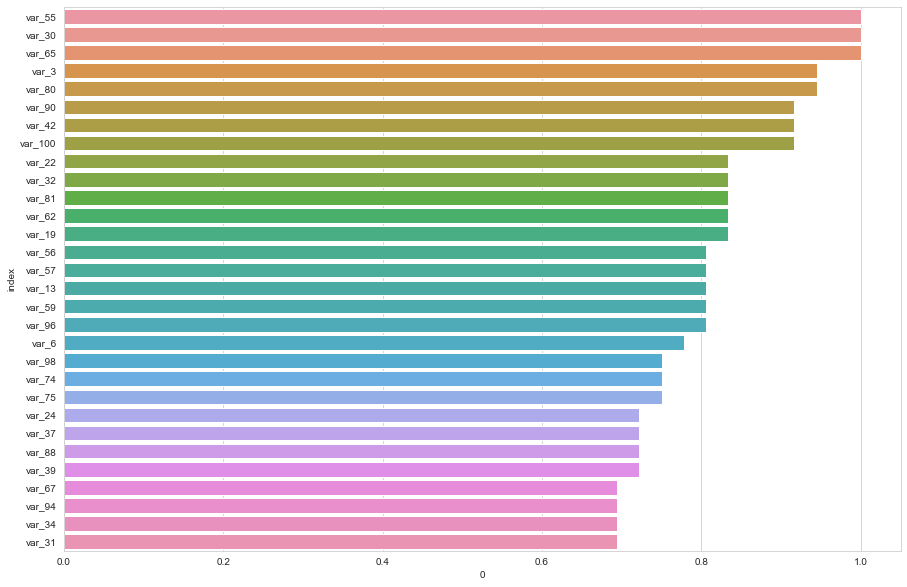

In [158]:
results = pd.DataFrame(sel.feature_performance_.values(),index=sel.feature_performance_.keys()).reset_index()
results.sort_values(by=0, ascending=False,inplace=True)
plt.figure(figsize=(15, 10))
sns.barplot(data=results[:30], y="index", x=0)  # sample 30 firsts

#### Univariate Regression

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
rf_reg = RandomForestRegressor(n_estimators = 10)

sel = SelectBySingleFeaturePerformance(estimator=rf,
                                       scoring='r2', # or neg rsme etc
                                       cv=3,
                                       threshold=0.5, #Above which the variables will be selected
                                       variables=None)

In [165]:
sel.fit(X_train_housing[:100],y_train_housing[:100]) # sample

/Users/alexandrecasula/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/alexandrecasula/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/alexandrecasula/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/alexandrecasula/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partiti

/Users/alexandrecasula/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/alexandrecasula/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/alexandrecasula/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/alexandrecasula/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less tha

/Users/alexandrecasula/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/alexandrecasula/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/alexandrecasula/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/alexandrecasula/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less tha

SelectBySingleFeaturePerformance(estimator=RandomForestClassifier(n_jobs=-1),
                                 scoring='r2', threshold=0.5,
                                 variables=['Id', 'MSSubClass', 'LotFrontage',
                                            'LotArea', 'OverallQual',
                                            'OverallCond', 'YearBuilt',
                                            'YearRemodAdd', 'MasVnrArea',
                                            'BsmtFinSF1', 'BsmtFinSF2',
                                            'BsmtUnfSF', 'TotalBsmtSF',
                                            '1stFlrSF', '2ndFlrSF',
                                            'LowQualFinSF', 'GrLivArea',
                                            'BsmtFullBath', 'BsmtHalfBath',
                                            'FullBath', 'HalfBath',
                                            'BedroomAbvGr', 'KitchenAbvGr',
                                            'TotRmsAbvGrd', 

<AxesSubplot:xlabel='0', ylabel='index'>

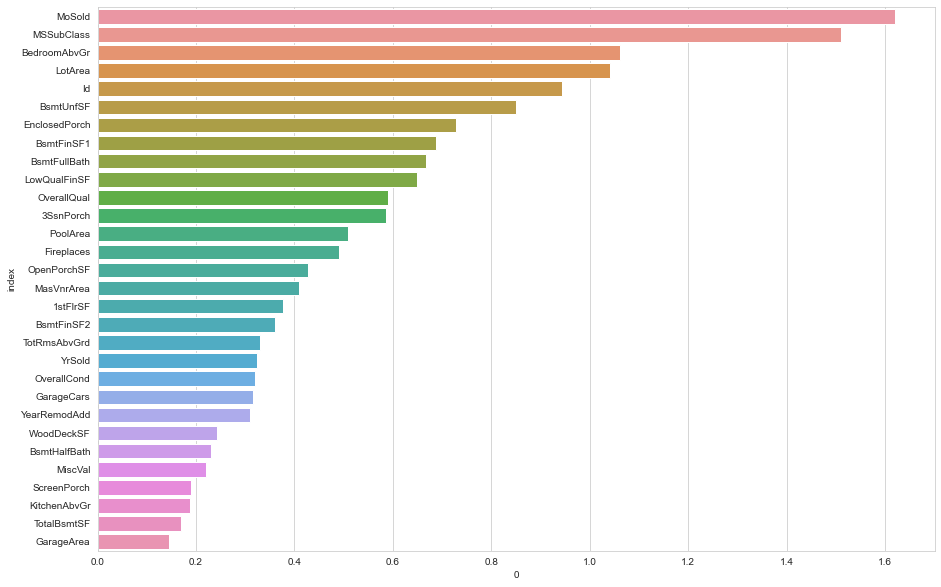

In [181]:
results = pd.DataFrame(sel.feature_performance_.values(),index=sel.feature_performance_.keys()).reset_index()
results[0] = abs(results[0])
results.sort_values(by=0, ascending=False,inplace=True)
plt.figure(figsize=(15, 10))
sns.barplot(data=results[:30], y="index", x=abs(0))  # sample 30 firsts

#### Target Mean Encoding

In [182]:
from feature_engine.selection import SelectByTargetMeanPerformance

In [184]:
sel = SelectByTargetMeanPerformance(
    variables=None, # automatically finds categorical and numerical variables
    scoring="roc_auc_score", # the metric to evaluate performance
    threshold=0.6, # the threshold for feature selection, 
    bins=3, # the number of intervals to discretise the numerical variables
    strategy="equal_frequency", # whether the intervals should be of equal size or equal number of observations
    cv=2,# cross validation
    random_state=1, #seed for reproducibility
)

sel.fit(X_train_titanic, y_train_titanic)

SelectByTargetMeanPerformance(bins=3, cv=2, random_state=1,
                              strategy='equal_frequency', threshold=0.6,
                              variables=['pclass', 'sex', 'age', 'sibsp',
                                         'parch', 'fare', 'embarked'])

In [191]:
X_train_titanic.head()

,pclass,sex,age,sibsp,parch,fare,embarked
737,3,1,44.0,0,1,16.1000,0
314,1,1,51.0,0,1,61.3792,1
1057,3,1,28.0,0,0,8.0500,0
319,1,1,62.0,0,0,26.5500,0
618,3,1,32.0,0,0,22.5250,0


In [187]:
sel.variables_categorical_

[]

In [189]:
sel.variables_numerical_

['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

In [192]:
sel.feature_performance_

{'pclass': 0.6575508240037204,
 'sex': 0.5,
 'age': 0.5560529968556911,
 'sibsp': 0.5174658674658674,
 'parch': 0.5,
 'fare': 0.6685685642227678,
 'embarked': 0.5}

With only two features above 0.5, the rest will be dropped.

In [193]:
sel.features_to_drop_

['sex', 'age', 'sibsp', 'parch', 'embarked']

In [195]:
sel.transform(X_train_titanic).head()

,pclass,fare
737,3,16.1000
314,1,61.3792
1057,3,8.0500
319,1,26.5500
618,3,22.5250
